### Подготовка данных

In [1]:
import numpy as np
import pandas as pd

from dask import dataframe as dd

from datetime import datetime
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter('ignore')



In [2]:
from dask.distributed import Client
c = Client()

In [44]:
c.dashboard_link

'http://127.0.0.1:8787/status'

#### Загрузим данные из файлов

In [4]:
features_df = dd.read_csv('./features.csv', sep='\t')

In [47]:
features_df.npartitions

351

In [48]:
features_df.head()

,Unnamed: 0,id,buy_time,0,1,2,3,4,5,6,...,243,244,245,246,247,248,249,250,251,252
0,0,2013026,1531688400,18.910029,46.980888,4.969214,-1.386798,3.791754,-14.01179,-16.08618,...,-977.373846,-613.770792,-25.996269,-37.630448,-301.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
1,1,2014722,1539550800,36.690029,152.400888,448.069214,563.833202,463.841754,568.99821,-16.08618,...,-891.373846,-544.770792,-20.996269,48.369552,80.252276,-13.832889,-0.694428,-1.175933,-0.45614,0.0
2,2,2015199,1545598800,-67.019971,157.050888,-63.180786,178.103202,-68.598246,156.99821,3.51382,...,-977.373846,-613.770792,-12.996269,-37.630448,10829.252276,-25.832889,-0.694428,-12.175933,-0.45614,0.0
3,3,2021765,1534107600,7.010029,150.200888,-6.930786,216.213202,76.621754,351.84821,-16.08618,...,-973.373846,-613.770792,-23.996269,-37.630448,-205.747724,-24.832889,-0.694428,-11.175933,-0.45614,1.0
4,4,2027465,1533502800,-90.439971,134.220888,-104.380786,153.643202,-109.798246,132.53821,-16.08618,...,1643.626154,2007.229208,206.003731,-21.630448,6667.252276,92.167111,-0.694428,49.824067,47.54386,0.0


In [49]:
features_df = features_df.drop('Unnamed: 0', axis=1)

In [50]:
features_df.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 255 entries, id to 252
dtypes: float64(253), int64(2)

In [9]:
train_df = pd.read_csv('data_train.csv')
train_df.head()

,Unnamed: 0,id,vas_id,buy_time,target
0,0,540968,8.0,1537131600,0.0
1,1,1454121,4.0,1531688400,0.0
2,2,2458816,1.0,1534107600,0.0
3,3,3535012,5.0,1535922000,0.0
4,4,1693214,1.0,1535922000,0.0


In [10]:
train_df = train_df.drop('Unnamed: 0', axis=1)

In [11]:
train_df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831653 entries, 0 to 831652
Columns: 4 entries, id to target
dtypes: float64(2), int64(2)
memory usage: 25.4 MB


#### Train_df

In [12]:
#создадим еще одно поле с "читаемой" датой для графика

train_df['buy_date'] = train_df['buy_time'].apply(lambda x: datetime.fromtimestamp(x))
train_df.head(5)

,id,vas_id,buy_time,target,buy_date
0,540968,8.0,1537131600,0.0,2018-09-17
1,1454121,4.0,1531688400,0.0,2018-07-16
2,2458816,1.0,1534107600,0.0,2018-08-13
3,3535012,5.0,1535922000,0.0,2018-09-03
4,1693214,1.0,1535922000,0.0,2018-09-03


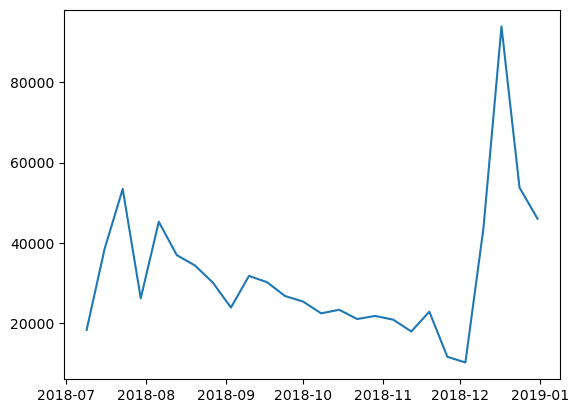

In [13]:
#активность оператора

plt.plot(train_df['buy_date'].value_counts().sort_index())

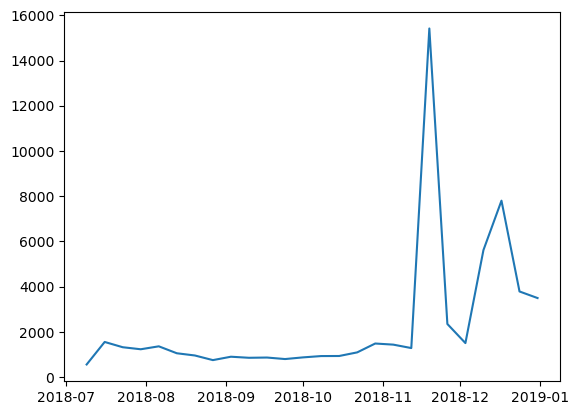

In [14]:
# подключение услуги абонентами

plt.plot(train_df.loc[train_df['target'] == 1, 'buy_date'].value_counts().sort_index())

In [15]:
train_df.loc[train_df['target'] == 1, 'buy_date'].value_counts().head(3)

2018-11-19    15418
2018-12-17     7802
2018-12-10     5616
Name: buy_date, dtype: int64

In [16]:
# 19 ноября пик подключения . Узнаем что это за услуга

train_df.loc[train_df['buy_date'] == '2018-11-19', 'vas_id'].value_counts()

4.0    7103
1.0    5752
2.0    4746
5.0    1982
6.0    1560
9.0     954
8.0     484
7.0     334
Name: vas_id, dtype: int64

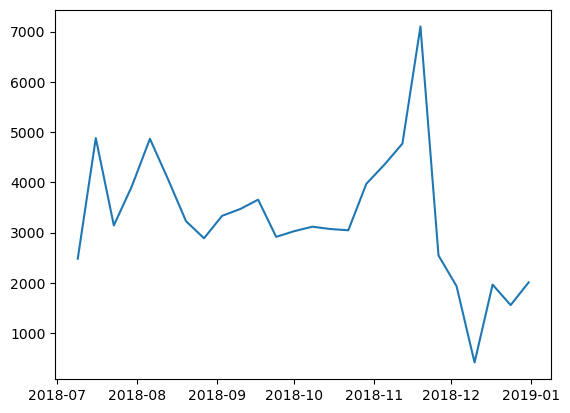

In [17]:
plt.plot(train_df.loc[train_df['vas_id'] == 4, 'buy_date'].value_counts().sort_index())

#### Features.csv

Возьмем из датасета с фичами только нужные строки. 

In [18]:
# train_df = dd.merge(train_df, features_df, how='inner', left_on=['id', 'buy_time'], right_on=['id', 'buy_time'])
train_df = train_df.sort_values(by='id')

In [51]:
ids = train_df['id'].unique()

features_df = features_df.loc[features_df['id'].isin(ids)]

In [52]:
features_df

,id,buy_time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252
npartitions=351,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [55]:
features_df = features_df.compute()

In [57]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 834168 entries, 13 to 12844
Columns: 255 entries, id to 252
dtypes: float64(253), int64(2)
memory usage: 1.6 GB


In [60]:
features_df.sort_values('id', inplace=True)

In [61]:
%%time

train_df = pd.merge_asof(train_df, features_df, on='id', by='buy_time', direction='nearest')

CPU times: user 5.74 s, sys: 8.69 s, total: 14.4 s
Wall time: 19.9 s


In [64]:
train_df.head(5)

,id,vas_id,buy_time,target,buy_date,0,1,2,3,4,...,243,244,245,246,247,248,249,250,251,252
0,2,2.0,1545598800,0.0,2018-12-24,-96.799971,229.530888,-110.740786,305.723202,-116.158246,...,2300.626154,1492.229208,-21.996269,-35.630448,368.252276,11.167111,7.305572,-12.175933,-0.45614,0.0
1,4,1.0,1533502800,0.0,2018-08-06,-19.599971,-177.419112,-25.910786,-206.286798,-31.328246,...,-977.373846,-613.770792,-25.996269,-37.630448,-299.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
2,15,1.0,1534107600,0.0,2018-08-13,-96.799971,-336.159112,-110.740786,-329.456798,-116.158246,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
3,16,2.0,1540760400,0.0,2018-10-29,155.310029,-92.509112,158.309214,-95.126798,152.891754,...,-977.373846,-613.770792,-25.996269,-37.630448,-291.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
4,29,1.0,1533502800,0.0,2018-08-06,-19.599971,-177.419112,-25.910786,-206.286798,-31.328246,...,-977.373846,-613.770792,-25.996269,-37.630448,-299.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0


In [65]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 831653 entries, 0 to 831652
Columns: 258 entries, id to 252
dtypes: datetime64[ns](1), float64(255), int64(2)
memory usage: 1.6 GB


In [66]:
# уменьшим размер датасета изменив тип данных в некоторых столбцах

train_df[train_df.select_dtypes(include='float64').columns] = \
    train_df.select_dtypes(include='float64').astype('float32')

In [67]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 831653 entries, 0 to 831652
Columns: 258 entries, id to 252
dtypes: datetime64[ns](1), float32(255), int64(2)
memory usage: 834.4 MB


In [68]:
#уберем столбцы с датами
train_df.drop('buy_date', axis=1, inplace=True)
train_df.drop('buy_time', axis=1, inplace=True)

#уберем ID пользователей, так как они не несут никакой смысловой нагрузки для модели
train_df.drop('id', axis=1, inplace=True)


In [69]:
train_df.to_csv('./train_df.csv')

In [86]:
import pickle

with open('train_df.pkl', 'wb') as f:
    pickle.dump(train_df, f)

#### Test_df

Аналогичным образом подготовим тестовый датасет

In [5]:
test_df = pd.read_csv('data_test.csv')
test_df.head()

,Unnamed: 0,id,vas_id,buy_time
0,0,3130519,2.0,1548018000
1,1,2000860,4.0,1548018000
2,2,1099444,2.0,1546808400
3,3,1343255,5.0,1547413200
4,4,1277040,2.0,1546808400


In [6]:
test_df = test_df.drop('Unnamed: 0', axis=1)

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71231 entries, 0 to 71230
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        71231 non-null  int64  
 1   vas_id    71231 non-null  float64
 2   buy_time  71231 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 1.6 MB


In [8]:
features_df = dd.read_csv('features.csv', sep='\t')

ids = test_df['id'].unique()

features_df = features_df.loc[features_df['id'].isin(ids)]

features_df = features_df.compute()


KeyboardInterrupt



In [78]:
%%time
features_df.sort_values('id', inplace=True)
test_df.sort_values('id', inplace=True)
test_df = pd.merge_asof(test_df, features_df, on='id', by='buy_time', direction='nearest')

CPU times: user 466 ms, sys: 372 ms, total: 837 ms
Wall time: 896 ms


In [79]:
# уменьшим размер датасета изменив тип данных в некоторых столбцах

test_df[test_df.select_dtypes(include='float64').columns] = \
    test_df.select_dtypes(include='float64').astype('float32')

In [80]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71231 entries, 0 to 71230
Columns: 257 entries, id to 252
dtypes: float32(254), int64(3)
memory usage: 71.2 MB


In [83]:
#уберем столбцы с датами
test_df.drop('buy_time', axis=1, inplace=True)

#уберем ID пользователей, так как они не несут никакой смысловой нагрузки для модели
test_df.drop('id', axis=1, inplace=True)

In [85]:
with open('test_df.pkl', 'wb') as f:
    pickle.dump(test_df, f)